<a href="https://colab.research.google.com/github/DanielWarfield1/MLWritingAndResearch/blob/main/PositionalEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

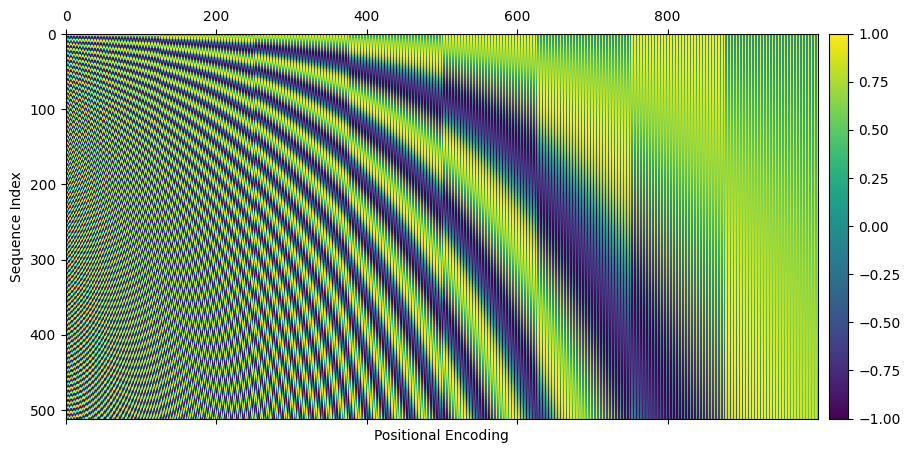

In [37]:
"""
Plotting positional encoding for each index.
A positional encoding for a single token would be a horizontal row in the image

inspired by https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/
"""

import numpy as np
import matplotlib.pyplot as plt

#these would be defined based on the vector embedding and sequence
sequence_length = 512
embedding_dimension = 1000

#generating a positional encodings
def gen_positional_encodings(sequence_length, embedding_dimension):
    #creating an empty placeholder
    positional_encodings = np.zeros((sequence_length, embedding_dimension))

    #itterating over each element in the sequence
    for i in range(sequence_length):

        #calculating the values of this sequences position vector
        #as defined in section 3.5 of the attention is all you need
        #paper: https://arxiv.org/pdf/1706.03762.pdf
        for j in np.arange(int(embedding_dimension/2)):
            denominator = np.power(sequence_length, 2*j/embedding_dimension)
            positional_encodings[i, 2*j] = np.sin(i/denominator)
            positional_encodings[i, 2*j+1] = np.cos(i/denominator)

    return positional_encodings

#rendering
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylabel('Sequence Index')
ax.set_xlabel('Positional Encoding')
cax = ax.matshow(gen_positional_encodings(sequence_length, embedding_dimension))
fig.colorbar(cax, pad=0.01)

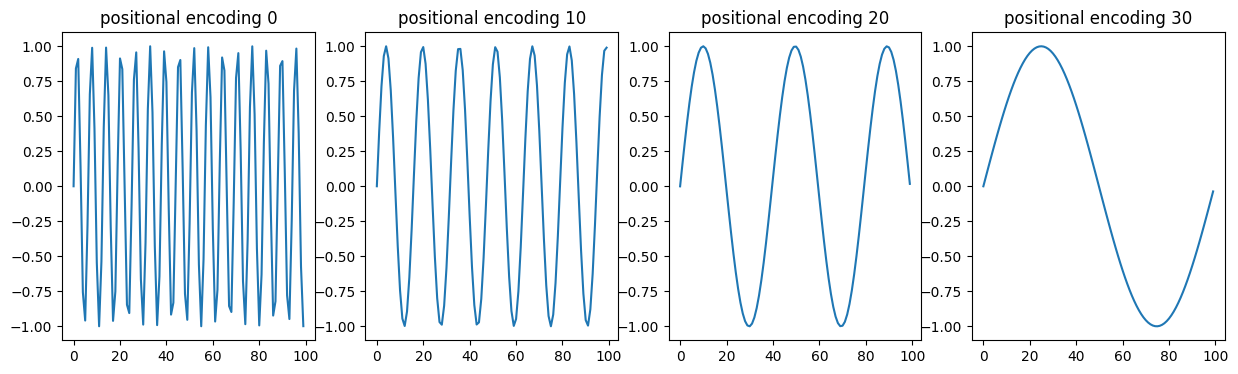

In [43]:
"""
Rendering out a few individual examples

inspired by https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/
"""
positional_encodings = gen_positional_encodings(100, 50)
fig = plt.figure(figsize=(15, 4))
for i in range(4):
    ax = plt.subplot(141 + i)
    idx = i*10
    plt.plot(positional_encodings[:,idx])
    ax.set_title(f'positional encoding {idx}')
plt.show()